# Baseball Hall of Fame
The `baseball` database contains 4 tables, described as below:
- `hof_inducted`: This table consists of the voting results for all candidates inducted into the Baseball Hall of Fame.
- `hof_not_inducted`: This table consists of the voting results for all candidates nominated for, but not inducted into, the Baseball Hall of Fame.
- `people`: This table consists of personal and biographical details of every player that appears in either the hof_inducted table or the hof_not_inducted table. A unique “playerid” field is assigned to each player.
- `salaries`: This table has player salary data since 1985.

## Preparation

In [1]:
# import libraries
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'baseball'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

## Questions

1. Draw a schema of the relationship between the `people`, `salaries`, and `hof_inducted` tables. 

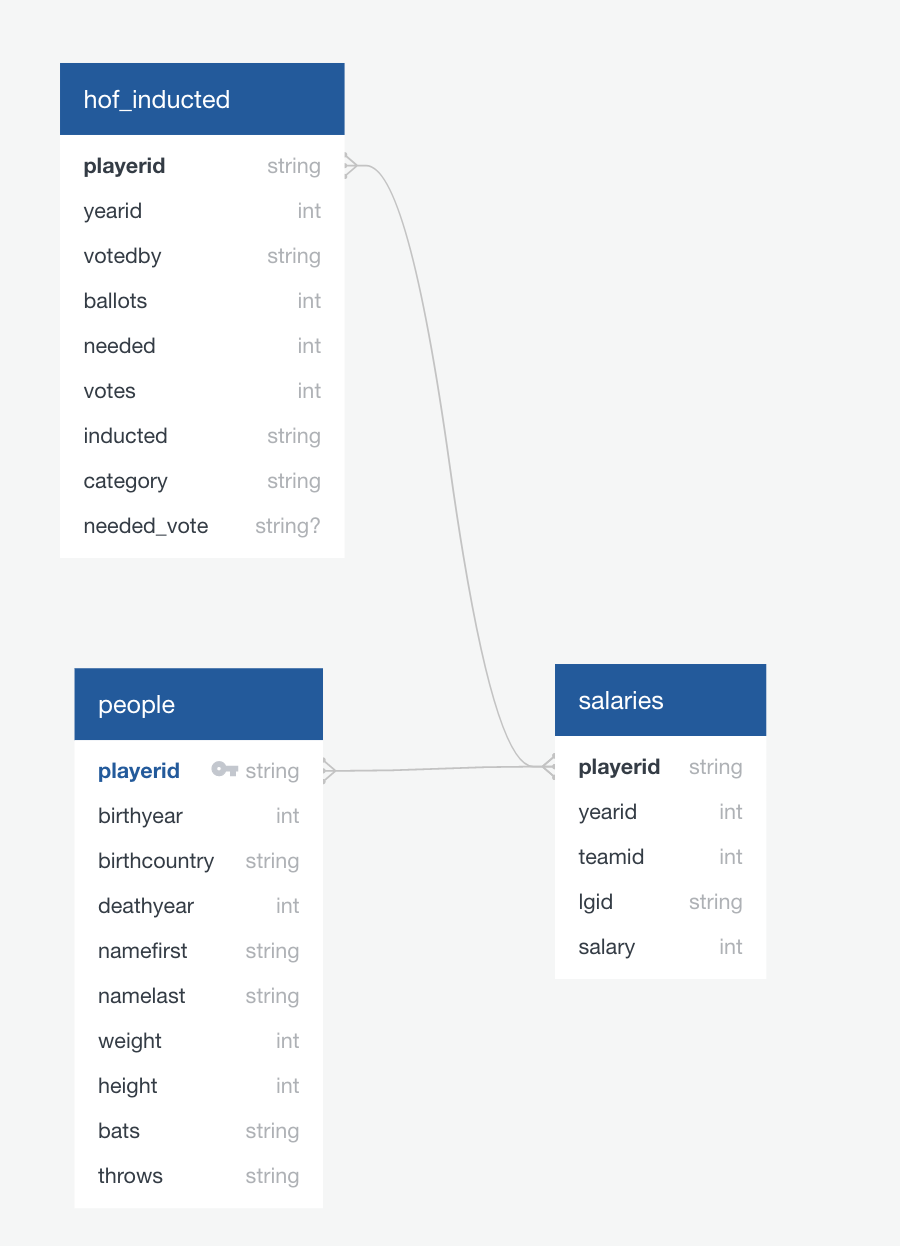

In [3]:
from IPython.display import Image
Image(filename='schema.png', width=400)

1) **What are the primary and foreign keys?** 
 
`playerid` is the primary key in both the `people` and the `hof_inducted` tables because it uniquely identifies one player in each of the two tables. In the `salaries` table, however, `playerid` is a foreign key since one player may have salaries from many years.

2) **What are the parent and child tables? Are these one-to-one, one-to-many, or many-to-many relationships?**

Both `hof_inducted` and `people` are parent tables to the child table `salaries`. There is a one-to-many relationship between `playerid` in the first two tables and the `playerid` in the `salaries`.

2. Write a query that returns the `namefirst` and `namelast` fields of the `people` table, along with the inducted field from the `hof_inducted` table. All rows from the `people` table should be returned, and `NULL` values for the fields from `hof_inducted` should be returned when there is no match found.

In [4]:
# LEFT OUTER JOIN people and hof_inducted and return desired fields
sql = '''
SELECT namefirst, namelast, inducted
FROM people
LEFT OUTER JOIN hof_inducted
ON people.playerid = hof_inducted.playerid
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,namefirst,namelast,inducted
0,David,Aardsma,None
1,Hank,Aaron,Y
2,Tommie,Aaron,None
3,Don,Aase,None
4,Andy,Abad,None


3. In 2006, a special Baseball Hall of Fame induction was conducted for players from the negro baseball leagues of the 20th century. In that induction, 17 players were posthumously inducted into the Baseball Hall of Fame. Write a query that returns the first and last names, birth and death dates, and birth countries for these players. Note that the year of induction was 2006, and the value for `votedby` will be `Negro League`.

In [5]:
# LEFT OUTER JOIN people and hof_inducted to get player and induction details 
# filter by year and voted by the find target players
sql = '''
SELECT namefirst, namelast, birthyear, deathyear, birthcountry
FROM people
LEFT OUTER JOIN hof_inducted
ON people.playerid = hof_inducted.playerid
WHERE yearid = 2006 AND votedby = 'Negro League'
'''

# display results 
pd.read_sql_query(sql, con=engine).head()

,namefirst,namelast,birthyear,deathyear,birthcountry
0,Ray,Brown,1908,1965,USA
1,Willard,Brown,1915,1996,USA
2,Andy,Cooper,1898,1941,USA
3,Frank,Grant,1865,1937,USA
4,Pete,Hill,1882,1951,USA


4. Write a query that returns the `yearid`, `playerid`, `teamid`, and `salary` fields from the `salaries` table, along with the `category` field from the `hof_inducted` table. Keep only the records that are in both `salaries` and `hof_inducted`. (Hint: While a field named `yearid` is found in both tables, don't JOIN by it. You must, however, explicitly name which field to include.)

In [6]:
# INNER JOIN salaries and category
# SELECT desired fields from the proper tables
sql = '''
SELECT salaries.yearid, salaries.playerid, teamid, salary, category
FROM salaries 
INNER JOIN hof_inducted
ON salaries.playerid = hof_inducted.playerid
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,yearid,playerid,teamid,salary,category
0,1985,suttebr01,ATL,1354167,Player
1,1985,murraed02,BAL,1472819,Player
2,1985,ripkeca01,BAL,800000,Player
3,1985,boggswa01,BOS,1000000,Player
4,1985,riceji01,BOS,779227,Player


5. Write a query that returns the `playerid`, `yearid`, `teamid`, `lgid`, and `salary` fields from the `salaries` table and the `inducted` field from the `hof_inducted` table. Keep all records from both tables.

In [25]:
# FULL OUTER JOIN salaries and hof_inducted
# SELECT desired fields
sql = '''
SELECT salaries.playerid, salaries.yearid, teamid, lgid, salary, inducted
FROM salaries
FULL OUTER JOIN hof_inducted
ON salaries.playerid = hof_inducted.playerid
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,playerid,yearid,teamid,lgid,salary,inducted
0,barkele01,1985.0,ATL,NL,870000.0,None
1,bedrost01,1985.0,ATL,NL,550000.0,None
2,benedbr01,1985.0,ATL,NL,545000.0,None
3,campri01,1985.0,ATL,NL,633333.0,None
4,ceronri01,1985.0,ATL,NL,625000.0,None


6. There are 2 tables, `hof_inducted` and `hof_not_inducted`, indicating successful and unsuccessful inductions into the Baseball Hall of Fame, respectively.

1) Combine these 2 tables by all fields. Keep all records.

In [10]:
# use UNION ALL to concatenate hof_inducted and hof_not_inducted
sql = '''
SELECT * 
FROM hof_inducted

UNION ALL 

SELECT * 
FROM hof_not_inducted
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,playerid,yearid,votedby,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,None
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,None
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,None
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,None
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,None


2) Get a distinct list of all player IDs for players who have been put up for HOF induction.

In [9]:
# only SELECT playerid in both tables
# by default, UNION returns distinct results
sql = '''
SELECT playerid
FROM hof_inducted

UNION

SELECT playerid
FROM hof_not_inducted
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,playerid
0,dunnja01
1,mitchke01
2,morame01
3,willijo99
4,maysca01


7. Write a query that returns the last name, first name (see `people` table), and total recorded salaries for all players found in the `salaries` table.

In [32]:
# generate a CTE w/ each player's total salary
# INNER JOIN the new table with people
# SELECT  desired fields
sql = '''
WITH player_total AS
(
 SELECT playerid, SUM(salary) AS total_salary
 FROM salaries
 GROUP BY playerid
)

SELECT namelast, namefirst, total_salary
FROM player_total
INNER JOIN people
ON player_total.playerid = people.playerid
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,namelast,namefirst,total_salary
0,Montas,Frankie,510000
1,Saito,Takashi,11200000
2,Escalona,Edgmer,491000
3,Ramirez,Julio,500000
4,Suzuki,Mac,752000


In [7]:
# simpler solution
sql = '''
SELECT namelast, namefirst, SUM(salary)
FROM salaries LEFT OUTER JOIN people
ON salaries.playerid = people.playerid
GROUP BY namelast, namefirst
ORDER BY namelast, namefirst;
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,namelast,namefirst,sum
0,Aardsma,David,9259750
1,Aase,Don,2300000
2,Abad,Andy,327000
3,Abad,Fernando,3766400
4,Abbott,Jeff,985000


8. Write a query that returns all records from the `hof_inducted` and `hof_not_inducted` tables that include `playerid`, `yearid`, `namefirst`, and `namelast`. (Hint: Each FROM statement will include a LEFT OUTER JOIN!)

In [8]:
# LEFT OUTER JOIN each table wth people
# use UNION ALL to concatenate the two new tables
sql = '''
SELECT hof_inducted.playerid, yearid, namefirst, namelast 
FROM hof_inducted LEFT OUTER JOIN people
ON hof_inducted.playerid = people.playerid

UNION ALL 

SELECT hof_not_inducted.playerid, yearid, namefirst, namelast 
FROM hof_not_inducted LEFT OUTER JOIN people
ON hof_not_inducted.playerid = people.playerid;
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,playerid,yearid,namefirst,namelast
0,aaronha01,1982,Hank,Aaron
1,alexape01,1938,Pete,Alexander
2,alomaro01,2011,Roberto,Alomar
3,alstowa01,1983,Walter,Alston
4,andersp01,2000,Sparky,Anderson


9. Return a table including all records from both `hof_inducted` and `hof_not_inducted`, and include a new field, `namefull`, which is formatted as `namelast` , `namefirst` (in other words, the last name, followed by a comma, then a space, then the first name). The query should also return the `yearid` and `inducted` fields. Include only records since 1980 from both tables. Sort the resulting table by `yearid`, then `inducted` so that Y comes before N. Finally, sort by the `namefull` field, A to Z.

In [15]:
# combine hof_inducted and hof_not_inducted into hof
# LEFT OUTER JOIN hof with people
# concatenate namelast and namefirst into namefull
# SELECT desired fields
# filter and reorder records
sql = '''
WITH hof AS
( 
    SELECT *
    FROM hof_inducted
    
    UNION ALL
    
    SELECT *
    FROM hof_not_inducted
)

SELECT CONCAT(namelast, ', ', namefirst) AS namefull, yearid, inducted
FROM hof
LEFT OUTER JOIN people 
ON hof.playerid = people.playerid
WHERE yearid >= 1980
ORDER BY yearid, inducted DESC, namefull
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,namefull,yearid,inducted
0,"Kaline, Al",1980,Y
1,"Klein, Chuck",1980,Y
2,"Snider, Duke",1980,Y
3,"Yawkey, Tom",1980,Y
4,"Aker, Jack",1980,N


In [12]:
# alternatively, can do the same for both tables and then UNION ALL
sql = '''
SELECT concat(namelast,', ', namefirst) AS namefull, yearid, inducted
FROM hof_inducted LEFT OUTER JOIN people
ON hof_inducted.playerid = people.playerid
WHERE yearid >= 1980

UNION ALL 

SELECT concat(namelast,', ', namefirst) AS namefull, yearid, inducted
FROM hof_not_inducted LEFT OUTER JOIN people
ON hof_not_inducted.playerid = people.playerid
WHERE yearid >= 1980

ORDER BY yearid,  inducted DESC, namefull
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,namefull,yearid,inducted
0,"Kaline, Al",1980,Y
1,"Klein, Chuck",1980,Y
2,"Snider, Duke",1980,Y
3,"Yawkey, Tom",1980,Y
4,"Aker, Jack",1980,N


10. Write a query that returns the highest annual salary for each `teamid`, ranked from high to low, along with the corresponding `playerid`. Bonus! Return `namelast` and `namefirst` in the resulting table. (You can find these in the `people` table.)

In [20]:
# generate a temporary table with each team and its top salary
# generate another temporary table with playerid of top-paying players from each team
   # why?
   # if we just do salary = (SELECT MAX(salary) FROM salaries GROUP BY teamid),
   # we may end up including players whose salaries are the top of teams other than their own
   # self-JOIN by teamid makes sure players are from the correct teams
# LEFT OUTER JOIN the second table with people to get namelast and namefirst
sql = '''
WITH team_top AS
  ( 
  SELECT teamid, MAX(salary) AS top_salary
  FROM salaries
  GROUP BY teamid
  ),

top_players AS
  (
  SELECT team_top.teamid, playerid, team_top.top_salary
  FROM team_top
  LEFT OUTER JOIN salaries
  ON team_top.teamid = salaries.teamid
  WHERE team_top.top_salary = salaries.salary
  )

SELECT teamid, top_salary, top_players.playerid, namelast, namefirst
FROM top_players
LEFT OUTER JOIN people
ON top_players.playerid = people.playerid
ORDER BY top_salary DESC
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,teamid,top_salary,playerid,namelast,namefirst
0,NYA,33000000,rodrial01,Rodriguez,Alex
1,LAN,33000000,kershcl01,Kershaw,Clayton
2,NYA,33000000,rodrial01,Rodriguez,Alex
3,ARI,31799030,greinza01,Greinke,Zack
4,BOS,30000000,priceda01,Price,David


11. Select `birthyear`, `deathyear`, `namefirst`, and `namelast` of all the players born since the birth year of Babe Ruth (`playerid = 'ruthba01'`). Sort the results by birth year from low to high.

In [48]:
# SELECT desired fields from people
# filter and then order by birth year
sql = '''
SELECT birthyear, deathyear, namefirst, namelast
FROM people
WHERE birthyear >= (SELECT birthyear FROM people WHERE playerid = 'ruthba01')
ORDER BY birthyear
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,birthyear,deathyear,namefirst,namelast
0,1895,1964.0,Ed,Wingo
1,1895,1943.0,Bill,Webb
2,1895,1964.0,Kid,Willson
3,1895,1984.0,Ike,Davis
4,1895,1930.0,Gus,Sandberg


12. Using the `people` table, write a query that returns `namefirst`, `namelast`, and a field called `usaborn` where. The `usaborn` field should show the following: if the player's `birthcountry` is the USA, then the record is 'USA.' Otherwise, it's 'non-USA.' Order the results by 'non-USA' records first.

In [21]:
# use CASE WHEN to create a new field whose values condition on birthcountry
sql = '''
SELECT namefirst, namelast,
CASE 
  WHEN birthcountry = 'USA' THEN 'USA'
  ELSE 'non-USA'
END AS usaborn
FROM people
ORDER BY usaborn
'''

# display results
pd.read_sql_query(sql, con=engine).head()

,namefirst,namelast,usaborn
0,Andre,Rienzo,non-USA
1,Juan,Castillo,non-USA
2,Juan,Castillo,non-USA
3,Lendy,Castillo,non-USA
4,Luis,Castillo,non-USA


13. Calculate the average height for players throwing with their right hand versus their left hand. Name these fields `right_height` and `left_height`, respectively.

In [52]:
# calculate average height for left- and right-handed players respectively
sql = '''
SELECT
AVG(CASE WHEN throws = 'R' THEN height END) AS right_height,
AVG(CASE WHEN throws = 'L' THEN height END) AS left_height
FROM people
'''

# display results
pd.read_sql_query(sql, con=engine)

,right_height,left_height
0,72.317202,72.553022


14. Get the average of each team's maximum player salary since 2010. (Hint: `WHERE` will go inside your CTE.)

In [54]:
# first, find the top salary of each team since 2010
# then, LEFT OUTER JOIN the new table with salaries to find out which players are paid the top of their teams
  # since each team may have more than one top-paying player
  # if we just average top salaries over teams, 
  # the results are not properly weighted by the number of top players from each team
# calculate the average salary of top players

sql = '''
WITH team_top AS
  ( 
  SELECT teamid, MAX(salary) AS top_salary
  FROM salaries
  WHERE yearid >= 2010
  GROUP BY teamid
  ),

top_players AS
  (
  SELECT team_top.teamid, playerid, team_top.top_salary
  FROM team_top
  LEFT OUTER JOIN salaries
  ON team_top.teamid = salaries.teamid
  WHERE team_top.top_salary = salaries.salary
  )

SELECT AVG(top_salary) AS ave_top_salary
FROM top_players
'''

# display results
pd.read_sql_query(sql, con=engine)

,ave_top_salary
0,2.179361e+07
